In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Preprocessing


## Penggabungan data

In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
for csvname in os.listdir('/content/drive/MyDrive/click-id/dataset'):
  # print('/content/drive/MyDrive/click-id/dataset/' + csvname)
  # print(csvname[:-4:])
  df = pd.read_csv('/content/drive/MyDrive/click-id/dataset/' + csvname)
  df['image_path'] = pd.Series(['/content/drive/MyDrive/click-id/images/' + csvname[:-4:] + '/' + str(j) + '.jpg' for j in range(df.shape[0])])
  for i in range(df.shape[0]):
    if not os.path.exists(df.loc[i]['image_path']):
      # print(df.loc[i]['image_path'], "tidak ada")
      df.at[i,'image_path'] = np.nan
      # print(df.loc[i]['image_path'])

  df.dropna(subset = ['image_path'], inplace=True)
  # print(df.head(10))

  # print(df.head(3))
  # im = cv2.imread(df.loc[0]['image_path'])
  # cv2_imshow(im)

  df.to_csv('/content/drive/MyDrive/click-id/dataset_with_image/' + csvname)

In [ ]:
combined = pd.DataFrame()
for csvname in os.listdir('/content/drive/MyDrive/click-id/dataset_with_image'):
  df = pd.read_csv('/content/drive/MyDrive/click-id/dataset_with_image/' + csvname)
  combined = pd.concat([combined,df])

print(combined.shape)
combined.drop_duplicates(subset=['title'], inplace=True)
print(combined.shape)
# print(combined.columns[0:2])
combined.drop(columns=combined.columns[0:2], inplace=True)
combined.head()
combined.to_csv('/content/drive/MyDrive/click-id/dataset_with_image/combined.csv')

(13984, 13)
(13968, 13)


## Mengisi manual content NaN

In [ ]:
import pandas as pd
import numpy as np
import re

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/click-id/dataset_with_image/combined.csv')
nan_rows = df.isna().any(axis=1)
print(df[nan_rows].shape)
# print(df[nan_rows][['source','url']])
# print(df[nan_rows])

(36, 12)


In [ ]:
df[nan_rows]['url'].to_csv('nanplsfix.csv')

In [ ]:
nan_index = df[nan_rows].index
nan_index

Index([ 7585,  7616,  7619,  7623,  7631,  7688,  7796,  7811,  7911,  7928,
        8025,  8057,  8160,  8285,  8295,  8427,  8442,  8719,  8763,  8805,
        8833,  8956,  9010,  9054,  9207,  9280,  9770,  9803,  9823,  9864,
        9919, 10031, 10117, 12817, 13249, 13253],
      dtype='int64')

In [ ]:
for i in nan_index:
  df.at[i,'content'] = input(i)

9207Artis Dian Sastrowardoyo mengaku gemas dengan perangai yang dimiliki oleh sang suami, Maulana Indraguna.  Sebab karena sikap yang dimiliki Maulana Indraguna, Dian Sastro, panggilan karibnya disapa itu mengaku kerap didiamkan oleh sang suami selama dua hari.  Menurut Dian Sastro, perangai yang dimiliki oleh sang suami itu sebenarnya adalah karena hal sepele.  Perangai itu rupanya berkaitan dengan stereotype alias anggapan soal bentuk rambut serta arti dari kecantikan pada wanita.  Dilansir TribunnewsBogor.com dari tayangan Tonightshow edisi Senin (9/9/2019), Dian Sastro tampak yakin mengurai jawabannya tatkala Vincent memberikan pertanyaan.  Kala itu, Vincent meminta pendapat kepada Desta dan Dian Sastro soal perempuan dapat dikatakan cantik jika memiliki rambut hitam dan panjang.  "Setuju atau tidak setuju perempuan cantik kalau rambutnya hitam dan panjang ?" tanya Vincent.  Mendengar pertanyaan itu, Dian Sastro dan Vincent pun kompak menjawab tidak setuju.  Usai menjawab, Dian Sas

In [ ]:
nan_index = df[df.isna().any(axis=1)].index
nan_index

Index([], dtype='int64')

In [ ]:
df.to_csv('/content/drive/MyDrive/click-id/dataset_with_image/combined_fixednan.csv')

### harus manual

## Preprocessing text (worse than indobert encoder)

https://github.com/adeariniputri/text-preprocesing

In [ ]:
pip install sastrawi

In [20]:
import csv
import nltk
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemover, ArrayDictionary
import string

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/click-id/dataset_with_image/combined_fixednan.csv')
df.head(3)

,Unnamed: 0.1,Unnamed: 0,title,label,label_score,source,date,time,category,sub-category,content,url,image_path
0,0,0,"Masuk Radar Pilwalkot Medan, Menantu Jokowi Be...",non-clickbait,0,detik.com,10 September 2019,23:40,detikNews,Berita,"Medan - Menantu Jokowi, Bobby Afif Nasution, m...",https://news.detik.com/berita/d-4701171/masuk-...,/content/drive/MyDrive/click-id/images/detik/0...
1,1,1,Malaysia Sudutkan RI: Isu Kabut Asap hingga In...,non-clickbait,0,detik.com,10 September 2019,21:32,detikNews,Berita,Jakarta - Malaysia kembali menyerang pemerinta...,https://news.detik.com/berita/d-4701078/malays...,/content/drive/MyDrive/click-id/images/detik/1...
2,2,2,Viral! Driver Ojol di Bekasi Antar Pesanan Mak...,clickbait,1,detik.com,10 September 2019,21:20,detikNews,Berita,Bekasi - Seorang driver ojek online di Bekasi ...,https://news.detik.com/berita/d-4701077/viral-...,/content/drive/MyDrive/click-id/images/detik/2...


In [ ]:
nan_rows = df.isna().any(axis=1)
df[nan_rows]

,Unnamed: 0.1,Unnamed: 0,title,label,label_score,source,date,time,category,sub-category,content,url,image_path


In [ ]:
def filtering_text(text):
    text = text.lower()
    text = re.sub(r'https?:\/\/\S+','',text)
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    text = re.sub(r'(b\'{1,2})',"", text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans("","",string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['filtered_title'] = df['title'].apply(filtering_text)
df['filtered_content'] = df['content'].apply(filtering_text)
df[['filtered_title','filtered_content']].head(5)

,filtered_title,filtered_content
0,masuk radar pilwalkot medan menantu jokowi ber...,medan menantu jokowi bobby afif nasution menya...
1,malaysia sudutkan ri isu kabut asap hingga inv...,jakarta malaysia kembali menyerang pemerintah ...
2,viral driver ojol di bekasi antar pesanan maka...,bekasi seorang driver ojek online di bekasi me...
3,kemensos salurkan rp m bagi korban kerusuhan s...,jakarta kementerian sosial kemensos menyalurka...
4,terkait mayat bayi mengenaskan di tangerang se...,tangerang polisi menangkap pria berinisial jn ...


In [ ]:
df[df.isna().any(axis=1)]

,Unnamed: 0.1,Unnamed: 0,title,label,label_score,source,date,time,category,sub-category,content,url,image_path,filtered_title,filtered_content


In [ ]:
#Proses stopwords dan stemming
with open('kamus.txt') as kamus:
    word = kamus.readlines()
    list_stopword = [line.replace('\n',"") for line in word]
dictionary = ArrayDictionary(list_stopword)
stopword = StopWordRemover(dictionary)


factory_stemmer = StemmerFactory()
stemmer = factory_stemmer.create_stemmer()

def stop_stem(text):
    text = stopword.remove(text)
    text = stemmer.stem(text)
    global nama
    global n
    print(nama, n, text[:30])
    n += 1
    return text

nama = 'title'
n = 0
df['cleaned_title'] = df['filtered_title'].apply(stop_stem)
nama = 'content'
n = 0
df['cleaned_content'] = df['filtered_content'].apply(stop_stem)
df.to_csv('/content/drive/MyDrive/click-id/dataset_with_image/combined_cleaned.csv')

Streaming output truncated to the last 5000 lines.
content 8968 cegah anggota dpr pergi luar n
content 8969 program director bakti olahrag
content 8970 bagi traveler baru pertama kal
content 8971 rahman warga desa sumber jaya 
content 8972 dalam dakwa ungkap bila suruh 
content 8973 badan ekonomi kreatif bekraf l
content 8974 akan jamu dalam laga tunda lig
content 8975 umum akan hadir untuk smartpho
content 8976 indonesia tuntut kemenristekdi
content 8977 politis senior kembali dapat k
content 8978 orang guna facebook nama nik y
content 8979 rahman laku baco dua orang tem
content 8980 keluarga presiden ri bacharudd
content 8981 polisi resor nganjuk telah ung
content 8982 akan luncur smartphone baru se
content 8983 akan hadap sela lamongan dalam
content 8984 belakang viral kisah curi bany
content 8985 muat dalam mobil jenis pikap b
content 8986 tim nasional indonesia akan ha
content 8987 sibuk dengan jadwal kerja pada
content 8988 wakil ketua laode syarif respo
content 8989 dakwa milik 

In [ ]:
df.drop(columns=['filtered_title', 'filtered_content'], inplace=True)
df.to_csv('/content/drive/MyDrive/click-id/dataset_with_image/combined_cleaned.csv')
df.head(5)

,Unnamed: 0.1,Unnamed: 0,title,label,label_score,source,date,time,category,sub-category,content,url,image_path,cleaned_title,cleaned_content
0,0,0,"Masuk Radar Pilwalkot Medan, Menantu Jokowi Be...",non-clickbait,0,detik.com,10 September 2019,23:40,detikNews,Berita,"Medan - Menantu Jokowi, Bobby Afif Nasution, m...",https://news.detik.com/berita/d-4701171/masuk-...,/content/drive/MyDrive/click-id/images/detik/0...,masuk radar pilwalkot medan menantu jokowi tem...,medan menantu jokowi bobby afif nasution samba...
1,1,1,Malaysia Sudutkan RI: Isu Kabut Asap hingga In...,non-clickbait,0,detik.com,10 September 2019,21:32,detikNews,Berita,Jakarta - Malaysia kembali menyerang pemerinta...,https://news.detik.com/berita/d-4701078/malays...,/content/drive/MyDrive/click-id/images/detik/1...,malaysia sudut ri isu kabut asap hingga invasi...,jakarta malaysia kembali serang perintah indon...
2,2,2,Viral! Driver Ojol di Bekasi Antar Pesanan Mak...,clickbait,1,detik.com,10 September 2019,21:20,detikNews,Berita,Bekasi - Seorang driver ojek online di Bekasi ...,https://news.detik.com/berita/d-4701077/viral-...,/content/drive/MyDrive/click-id/images/detik/2...,viral driver ojol bekas antar pesan makan paka...,bekas orang driver ojek online bekas jadi vira...
3,3,3,"Kemensos Salurkan Rp 7,3 M bagi Korban Kerusuh...",non-clickbait,0,detik.com,10 September 2019,21:39,detikNews,Berita,Jakarta - Kementerian Sosial (Kemensos) menyal...,https://news.detik.com/berita/d-4701086/kemens...,/content/drive/MyDrive/click-id/images/detik/3...,kemensos salur rp bagi korban rusuh sosial papua,jakarta menteri sosial kemensos salur bantu ba...
4,4,4,"Terkait Mayat Bayi Mengenaskan di Tangerang, S...",non-clickbait,0,detik.com,10 September 2019,21:02,detikNews,Berita,Tangerang - Polisi menangkap pria berinisial J...,https://news.detik.com/berita/d-4701054/terkai...,/content/drive/MyDrive/click-id/images/detik/4...,kait mayat bayi enas tangerang orang pria tang...,tangerang polisi tangkap pria inisial jn kait ...


In [ ]:
kamus_normalisasi = pd.read_csv("slang.csv")
kata_normalisasi_dict = {}

for index, row in kamus_normalisasi.iterrows():
    if row[0] not in kata_normalisasi_dict:
        kata_normalisasi_dict[row[0]] = row[1]

def normalisasi_kata(document):
    document = document.split()
    return ' '.join([kata_normalisasi_dict[term] if term in kata_normalisasi_dict else term for term in document])

df['normalized_title'] = df['cleaned_title'].apply(normalisasi_kata)
df['normalized_content'] = df['cleaned_content'].apply(normalisasi_kata)

<ipython-input-69-6b2448e2038f>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in kata_normalisasi_dict:
<ipython-input-69-6b2448e2038f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kata_normalisasi_dict[row[0]] = row[1]


In [ ]:
df.drop(columns=['cleaned_title', 'cleaned_content'], inplace=True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.to_csv('/content/drive/MyDrive/click-id/dataset_with_image/combined_final.csv')
df.head(5)

,title,label,label_score,source,date,time,category,sub-category,content,url,image_path,normalized_title,normalized_content
0,"Masuk Radar Pilwalkot Medan, Menantu Jokowi Be...",non-clickbait,0,detik.com,10 September 2019,23:40,detikNews,Berita,"Medan - Menantu Jokowi, Bobby Afif Nasution, m...",https://news.detik.com/berita/d-4701171/masuk-...,/content/drive/MyDrive/click-id/images/detik/0...,masuk radar pilwalkot medan menantu jokowi tem...,medan menantu jokowi bobby afif nasution samba...
1,Malaysia Sudutkan RI: Isu Kabut Asap hingga In...,non-clickbait,0,detik.com,10 September 2019,21:32,detikNews,Berita,Jakarta - Malaysia kembali menyerang pemerinta...,https://news.detik.com/berita/d-4701078/malays...,/content/drive/MyDrive/click-id/images/detik/1...,malaysia sudut ri isu kabut asap hingga invasi...,jakarta malaysia kembali serang perintah indon...
2,Viral! Driver Ojol di Bekasi Antar Pesanan Mak...,clickbait,1,detik.com,10 September 2019,21:20,detikNews,Berita,Bekasi - Seorang driver ojek online di Bekasi ...,https://news.detik.com/berita/d-4701077/viral-...,/content/drive/MyDrive/click-id/images/detik/2...,viral driver ojol bekas antar pesan makan paka...,bekas orang driver ojek daring bekas jadi vira...
3,"Kemensos Salurkan Rp 7,3 M bagi Korban Kerusuh...",non-clickbait,0,detik.com,10 September 2019,21:39,detikNews,Berita,Jakarta - Kementerian Sosial (Kemensos) menyal...,https://news.detik.com/berita/d-4701086/kemens...,/content/drive/MyDrive/click-id/images/detik/3...,kemensos salur rp bagi korban rusuh sosial papua,jakarta menteri sosial kemensos salur bantu ba...
4,"Terkait Mayat Bayi Mengenaskan di Tangerang, S...",non-clickbait,0,detik.com,10 September 2019,21:02,detikNews,Berita,Tangerang - Polisi menangkap pria berinisial J...,https://news.detik.com/berita/d-4701054/terkai...,/content/drive/MyDrive/click-id/images/detik/4...,kait mayat bayi enas tangerang orang pria tang...,tangerang polisi tangkap pria inisial jn kait ...


## content yang rusak

In [1]:
import csv
import nltk
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemover, ArrayDictionary
import string

In [2]:
df = pd.read_csv('click-id/dataset_with_image/combined_final_final.csv')
print(df[df['normalized_content'].isna()]['title'])

2008    Sinopsis 'MELODYLAN', Ketika Harus Memilih Tuk...
2506    Alasan Black Widow Merelakan Diri di 'AVENGERS...
2512    Sinopsis Sinetron 'ORANG KETIGA' Episode 665, ...
5988                Perempuan dan Peran Dalam Pembangunan
6351               Akun Instagram Iron Man Diretas Hacker
7382    Demonstrasi Mahasiswa, Jalan Gatot Subroto Dep...
7556    Kebocaran Data Malindo, Lion Air Jamin Penumpa...
7701    Majelis Rakyat Belum Cabut Seruan Siswa Papua ...
7735    Susi Pudjiastuti Tegaskan Alasan Tenggelamkan ...
7902    Tinggalkan Google, Wanita Ini Ungkap Rahasia R...
7954    Bela Veronica Koman, Advokat Papua: Pengacara ...
8041    Lapindo Tak Bayar Utang Rp 1,7 T, Kemenkeu Lay...
8051    Kemenkeu Izinkan Dana Reboisasi Dipakai Mengat...
8239    Robot Militer Otonom Diklaim Berbahaya, Apa Saja?
8632    Genjot Investasi, Sofyan Djalil Janji Pangkas ...
8745    Sudirman Said: Pelemahan KPK Agenda Berjamaah ...
8850    Sofyan Djalil Ancam Spekulan Tanah, Bisa Dijer...
9098    Revisi

In [18]:
for i in df[df['normalized_content'].isna()].index:
    df.at[i,'content'] = input(df.at[i,'url'])

https://www.kapanlagi.com/showbiz/film/indonesia/sinopsis-melodylan-film-remaja-romantis-yang-tayang-bulan-april-016f23.html MELODYLAN menjadi salah satu film remaja yang akan dirilis pada bulan April mendatang. Film karya Fajar Nugros ini bakal menceritakan kehidupan cinta ala anak SMA. MELODYLAN memasangkan Devani Danendra dan Aisyah Aqilah sebagai pemeran utama.   Film ini mengisahkan seorang murid pindahan bernama Melody (Aisyah Aqilah). Dengan statusnya sebagai murid pindahan, ia langsung membuat geger geger satu sekolah karena kabar kedekatannya dengan Dylan (Devano Danendra). Bagaimana tidak, Dylan dikenal sebagai siswa laki-laki yang suka buat onar dan terkenal cool. Nama Melody menjadi terkenal dan dibicarakan oleh seantero sekolah.   1. Mengalami pengalaman buruk dengan mantan   Sebelum pindah, Melody ternyata memiliki pengalaman masa lalu yang buruk dengan mantan kekasihnya. Keputusannya untuk pindah sekolah pun diambil karena ia menghindari masalah tersebut. Namun ternyata 

In [19]:
print(df[df['normalized_content'].isna()]['title'])

2008    Sinopsis 'MELODYLAN', Ketika Harus Memilih Tuk...
2506    Alasan Black Widow Merelakan Diri di 'AVENGERS...
2512    Sinopsis Sinetron 'ORANG KETIGA' Episode 665, ...
5988                Perempuan dan Peran Dalam Pembangunan
6351               Akun Instagram Iron Man Diretas Hacker
7382    Demonstrasi Mahasiswa, Jalan Gatot Subroto Dep...
7556    Kebocaran Data Malindo, Lion Air Jamin Penumpa...
7701    Majelis Rakyat Belum Cabut Seruan Siswa Papua ...
7735    Susi Pudjiastuti Tegaskan Alasan Tenggelamkan ...
7902    Tinggalkan Google, Wanita Ini Ungkap Rahasia R...
7954    Bela Veronica Koman, Advokat Papua: Pengacara ...
8041    Lapindo Tak Bayar Utang Rp 1,7 T, Kemenkeu Lay...
8051    Kemenkeu Izinkan Dana Reboisasi Dipakai Mengat...
8239    Robot Militer Otonom Diklaim Berbahaya, Apa Saja?
8632    Genjot Investasi, Sofyan Djalil Janji Pangkas ...
8745    Sudirman Said: Pelemahan KPK Agenda Berjamaah ...
8850    Sofyan Djalil Ancam Spekulan Tanah, Bisa Dijer...
9098    Revisi

In [21]:
def filtering_text(text):
    text = text.lower()
    text = re.sub(r'https?:\/\/\S+','',text)
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    text = re.sub(r'(b\'{1,2})',"", text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans("","",string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['filtered_content'] = df['content'].apply(filtering_text)

In [22]:
with open('kamus.txt') as kamus:
    word = kamus.readlines()
    list_stopword = [line.replace('\n',"") for line in word]
dictionary = ArrayDictionary(list_stopword)
stopword = StopWordRemover(dictionary)

factory_stemmer = StemmerFactory()
stemmer = factory_stemmer.create_stemmer()

def stop_stem(text):
    text = stopword.remove(text)
    text = stemmer.stem(text)
    global nama
    global n
    print(nama, n, text[:30])
    n += 1
    return text

nama = 'content'
n = 0
df['cleaned_content'] = df['filtered_content'].apply(stop_stem)

content 0 medan menantu jokowi bobby afi
content 1 jakarta malaysia kembali seran
content 2 bekas orang driver ojek online
content 3 jakarta menteri sosial kemenso
content 4 tangerang polisi tangkap pria 
content 5 medan uang banyak rp milik pem
content 6 jakarta anggota badan kaji mpr
content 7 jakarta bumi cenderawasih tela
content 8 banyuwangi ingat tahun baru is
content 9 makassar perempuan usia tahun 
content 10 jakarta wakil ketua mpr ri hid
content 11 sleman sepeda motor warna puti
content 12 jakarta pt jakarta propertindo
content 13 jakarta pesan lantang tolak re
content 14 malang dalam kurang jam polisi
content 15 jakarta ketua dewan pers moham
content 16 jakarta tokoh papua abisai rol
content 17 bandung angin kencang memorakp
content 18 jakarta wakil ketua dpr fadli 
content 19 jakarta acara kivlan zen tonin
content 20 gresik orang warga surabaya ba
content 21 surabaya eksepsi bassist boome
content 22 jakarta kepala badan kaji tera
content 23 jakarta wakil presiden jusuf k
co

In [23]:
kamus_normalisasi = pd.read_csv("slang.csv")
kata_normalisasi_dict = {}

for index, row in kamus_normalisasi.iterrows():
    if row[0] not in kata_normalisasi_dict:
        kata_normalisasi_dict[row[0]] = row[1]

def normalisasi_kata(document):
    document = document.split()
    return ' '.join([kata_normalisasi_dict[term] if term in kata_normalisasi_dict else term for term in document])

df['normalized_content'] = df['cleaned_content'].apply(normalisasi_kata)

/tmp/ipykernel_177574/820535116.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in kata_normalisasi_dict:
/tmp/ipykernel_177574/820535116.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kata_normalisasi_dict[row[0]] = row[1]


In [25]:
df.to_csv('combined_final_final.csv')

In [26]:
print(df[df['normalized_content'].isna()]['title'])

Series([], Name: title, dtype: object)


## Preprocessing images

In [ ]:
!pip install tensorflow

In [1]:
import os
import re
import json
import string
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
import cv2
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

2025-05-26 21:48:55.035783: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/click-id/dataset_with_image/combined_final.csv')

In [ ]:
df[:3]['image_path']

In [ ]:
IMG_HEIGHT = 224
IMG_WIDTH = 224

result_df = df.copy()
result_df['image_path_processed'] = None
n = 0
for idx, row in result_df.iterrows():
    path = row['image_path']
    dirs = path.split('/')
    new_path = '/'.join(dirs[:5]) + '/processed_images/' + '/'.join(dirs[6:])
    result_df.at[idx, 'image_path_processed'] = new_path

    if os.path.exists(new_path):
      continue

    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize_with_pad(img, IMG_HEIGHT, IMG_WIDTH)

    im2arr = np.array(img)
    cv2.imwrite(new_path,cv2.cvtColor(im2arr, cv2.COLOR_RGB2BGR))

    print(new_path)
    n = n+1

In [ ]:
result_df[:10]['image_path_processed']

In [ ]:
result_df.to_csv('/content/drive/MyDrive/click-id/dataset_with_image/combined_final_final.csv')

## Data analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/click-id/dataset_with_image/combined_final.csv')
df.head(3)

,Unnamed: 0,title,label,label_score,source,date,time,category,sub-category,content,url,image_path,normalized_title,normalized_content
0,0,"Masuk Radar Pilwalkot Medan, Menantu Jokowi Be...",non-clickbait,0,detik.com,10 September 2019,23:40,detikNews,Berita,"Medan - Menantu Jokowi, Bobby Afif Nasution, m...",https://news.detik.com/berita/d-4701171/masuk-...,/content/drive/MyDrive/click-id/images/detik/0...,masuk radar pilwalkot medan menantu jokowi tem...,medan menantu jokowi bobby afif nasution samba...
1,1,Malaysia Sudutkan RI: Isu Kabut Asap hingga In...,non-clickbait,0,detik.com,10 September 2019,21:32,detikNews,Berita,Jakarta - Malaysia kembali menyerang pemerinta...,https://news.detik.com/berita/d-4701078/malays...,/content/drive/MyDrive/click-id/images/detik/1...,malaysia sudut ri isu kabut asap hingga invasi...,jakarta malaysia kembali serang perintah indon...
2,2,Viral! Driver Ojol di Bekasi Antar Pesanan Mak...,clickbait,1,detik.com,10 September 2019,21:20,detikNews,Berita,Bekasi - Seorang driver ojek online di Bekasi ...,https://news.detik.com/berita/d-4701077/viral-...,/content/drive/MyDrive/click-id/images/detik/2...,viral driver ojol bekas antar pesan makan paka...,bekas orang driver ojek daring bekas jadi vira...


### Panjang (karakter)

In [ ]:
df['label'].value_counts()

,count
label,
non-clickbait,7959
clickbait,6009


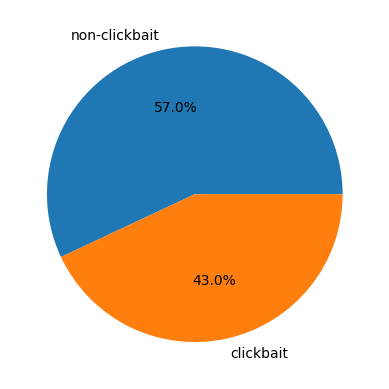

In [ ]:
plt.pie(df['label'].value_counts(), labels=df['label'].unique().tolist(), autopct='%1.1f%%')
plt.show()

<Axes: >

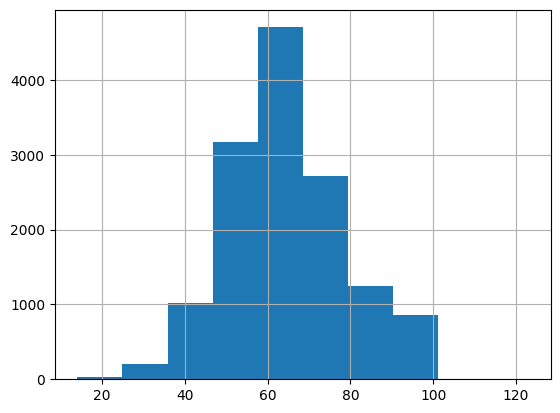

In [ ]:
df['title'].str.len().hist()

<Axes: >

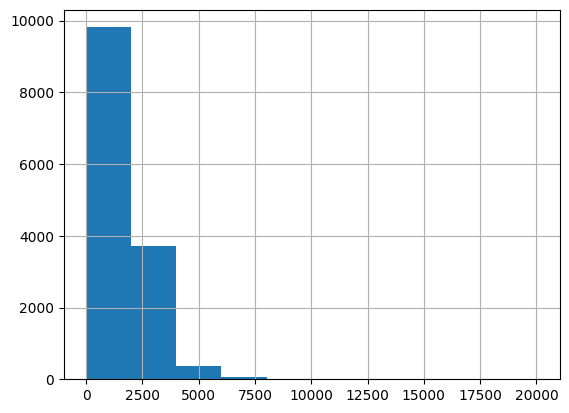

In [ ]:
df['content'].str.len().hist()

### Panjang(kata)

<Axes: >

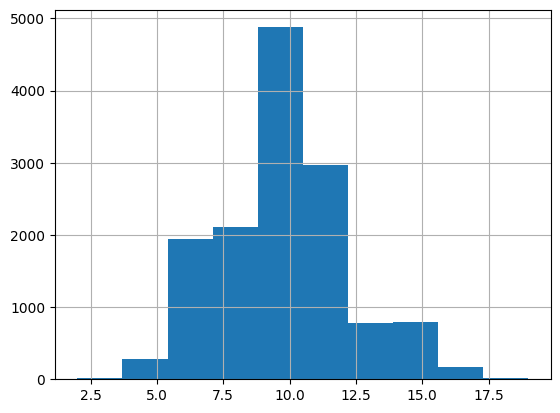

In [ ]:
df['title'].str.split().map(lambda x: len(x)).hist()

<Axes: >

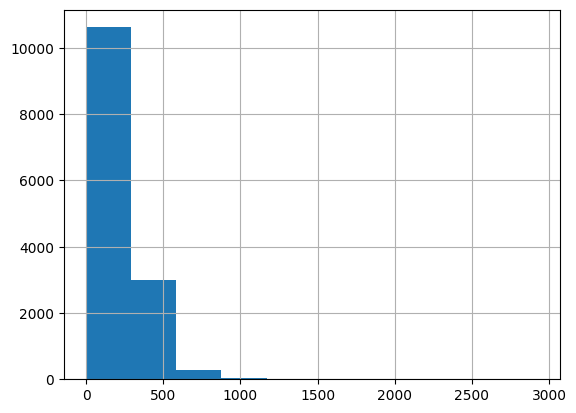

In [ ]:
df['content'].str.split().map(lambda x: len(x)).hist()

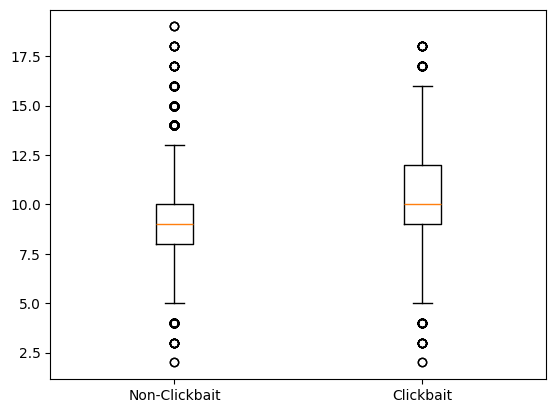

In [ ]:
df['title_word_count'] = df['title'].str.split().apply(len)
df_1 = df.where(df['label_score']==0).dropna()['title_word_count']
df_2 = df.where(df['label_score']==1).dropna()['title_word_count']

ax = plt.boxplot([df_1, df_2], tick_labels=['Non-Clickbait', 'Clickbait'])


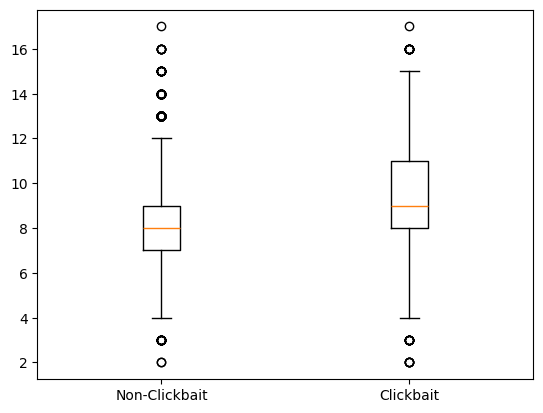

In [ ]:
df['normalized_title_word_count'] = df['normalized_title'].str.split().apply(len)
df_1 = df.where(df['label_score']==0).dropna()['normalized_title_word_count']
df_2 = df.where(df['label_score']==1).dropna()['normalized_title_word_count']

ax = plt.boxplot([df_1, df_2], tick_labels=['Non-Clickbait', 'Clickbait'])


### Wordcloud

In [ ]:
print(df.where(df['label_score']==0).dropna()['title'].count())
print(df.where(df['label_score']==1).dropna()['title'].count())

7944
6005


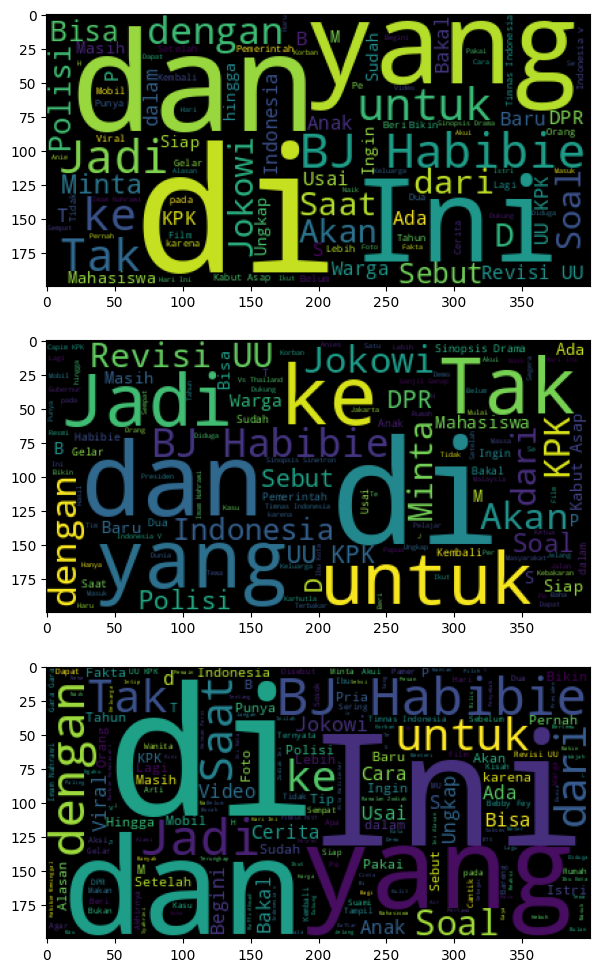

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud0 = WordCloud()
cloud1 = WordCloud()
cloud2 = WordCloud()
cloud0 = cloud0.generate(df['title'].to_string())
cloud1 = cloud1.generate(df.where(df['label_score']==0).dropna()['title'].to_string())
cloud2 = cloud2.generate(df.where(df['label_score']==1).dropna()['title'].to_string())

f, axarr = plt.subplots(3,1)
f.set_size_inches(8, 12)
axarr[0].imshow(cloud0)
axarr[1].imshow(cloud1)
axarr[2].imshow(cloud2)
plt.show()

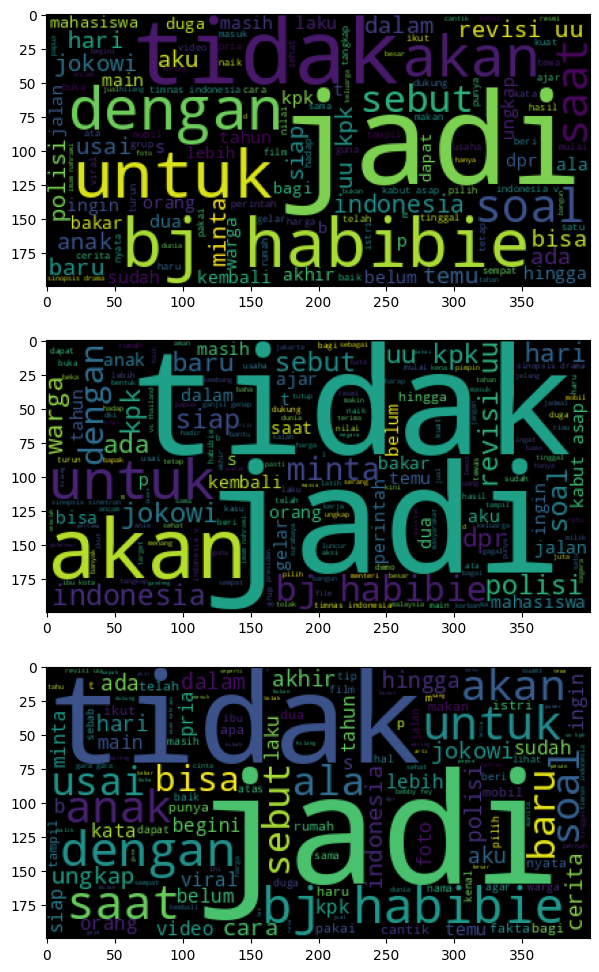

In [ ]:
cloud0 = cloud0.generate(df['normalized_title'].to_string())
cloud1 = cloud1.generate(df.where(df['label_score']==0).dropna()['normalized_title'].to_string())
cloud2 = cloud2.generate(df.where(df['label_score']==1).dropna()['normalized_title'].to_string())

f, axarr = plt.subplots(3,1)
f.set_size_inches(8, 12)
axarr[0].imshow(cloud0)
axarr[1].imshow(cloud1)
axarr[2].imshow(cloud2)
plt.show()

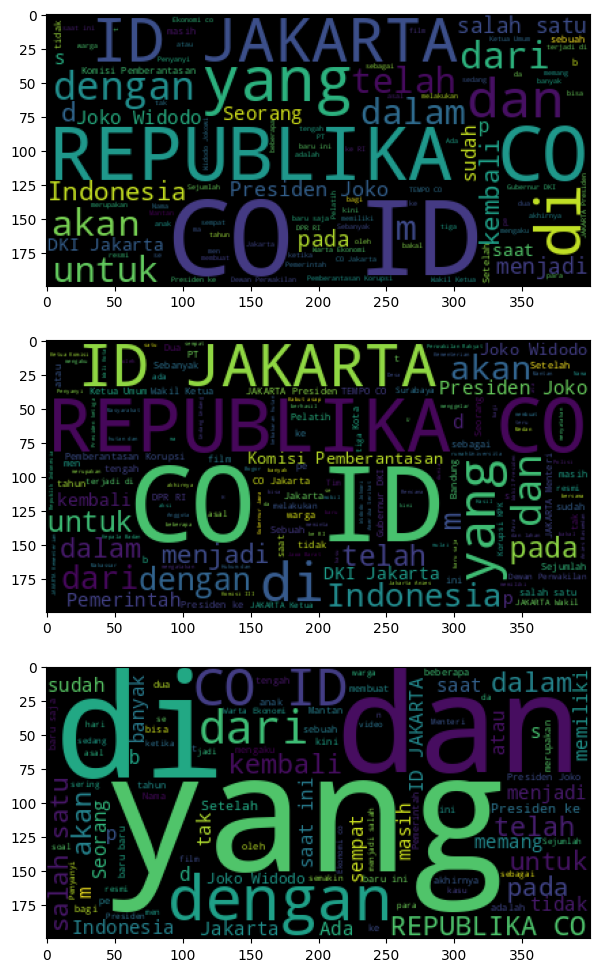

In [ ]:
cloud0 = WordCloud()
cloud1 = WordCloud()
cloud2 = WordCloud()
cloud0 = cloud0.generate(df['content'].to_string())
cloud1 = cloud1.generate(df.where(df['label_score']==0).dropna()['content'].to_string())
cloud2 = cloud2.generate(df.where(df['label_score']==1).dropna()['content'].to_string())

f, axarr = plt.subplots(3,1)
f.set_size_inches(8, 12)
axarr[0].imshow(cloud0)
axarr[1].imshow(cloud1)
axarr[2].imshow(cloud2)
plt.show()

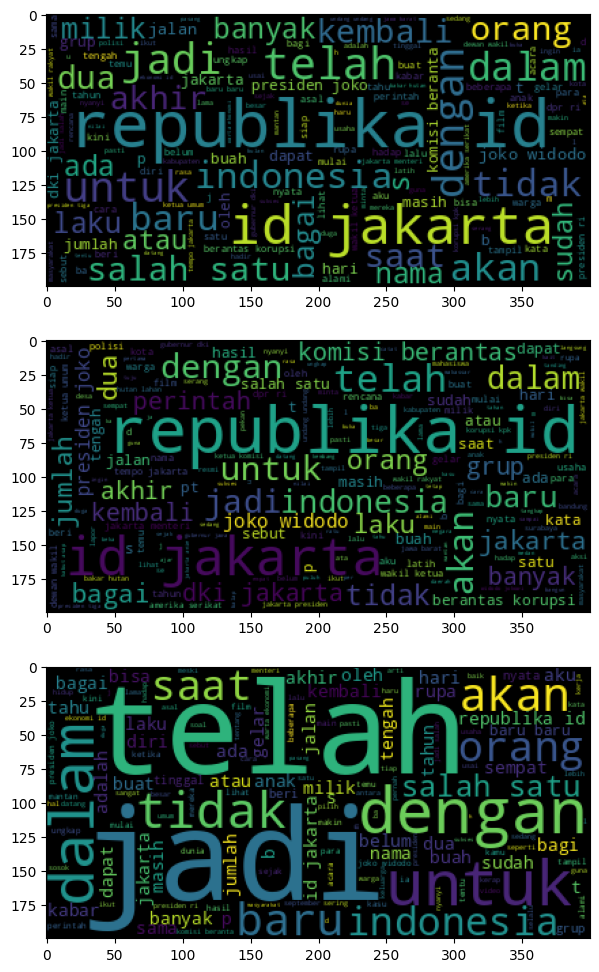

In [ ]:
cloud0 = cloud0.generate(df['normalized_content'].to_string())
cloud1 = cloud1.generate(df.where(df['label_score']==0).dropna()['normalized_content'].to_string())
cloud2 = cloud2.generate(df.where(df['label_score']==1).dropna()['normalized_content'].to_string())

f, axarr = plt.subplots(3,1)
f.set_size_inches(8, 12)
axarr[0].imshow(cloud0)
axarr[1].imshow(cloud1)
axarr[2].imshow(cloud2)
plt.show()